Consider the function

$$f(x) = \tanh^2(x),\qquad \qquad x\in[-1,1] $$
    
* In a numpy array named `y0`, sample $f(x)$ on the interval above with 10 evenly spaced points.

* Perform a Lagrange polynomial fit using `y0` as the knots. The outcome of your interpolation should be an array storing the coefficients of the polynomial `coeff` (ordered with largest power first). 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})    

x0 = np.linspace(-1,1,10)
y0 = (np.tanh(x0))**2

A = np.vander(x0)

coeff = np.linalg.solve(A,y0)
                
coeff


array([-8.21565038e-15, -8.15596182e-02,  1.47402355e-14,  3.15230726e-01,
       -7.74398670e-15, -6.52628547e-01,  1.21027456e-15,  9.98972435e-01,
       -1.88920726e-17,  1.06613957e-05])

Create one figure with two subplots; one subplot of the interpolant $p_{10}(0)$ alongside $f(x)$ using 100 evaluation points, $x\in[-1,1]$, and another subplot of the error, $|f(x)-p_{10}(x)|$ in this approximation. Take care to label your figure appropriately. **[2]**

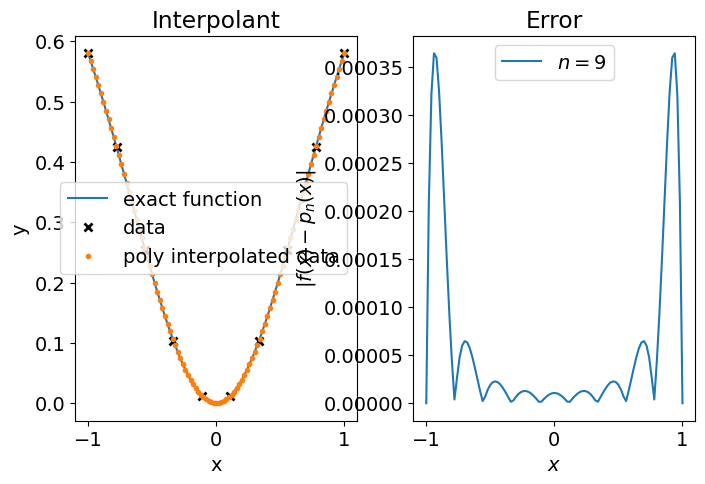

In [4]:
# p9 since degree 9 fitted with x not zero

M = 10
N = 101

x = np.linspace(-1,1,N)

y = np.zeros_like(x)

for i in range(0,M):       
    y += coeff[i]*x**(M-1-i)
    
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(8,5))

ax1.plot(x,(np.tanh(x))**2,label='exact function')
ax1.plot(x0,y0,'kx',mew=2,label='data')
ax1.plot(x,y,'.',label='poly interpolated data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Interpolant')
ax1.legend()


lbl = '$n = $'+str(9)
ax2.plot(x,np.abs(y-(np.tanh(x))**2),label=lbl)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$|f(x)-p_n(x)|$')
ax2.set_title('Error')
ax2.legend()
    
plt.show()



Create your own function, named myVan(x) which takes a 1-dimensional numpy array as input and returns the Vandermonde matrix, i.e. equivalent to np.vander. 1 mark is available for not using the example in the documentation and using array broadcasting instead.

In [5]:
def myVan(x):
    x_array = x.reshape(len(x),1)
    powers_array = np.arange(0, len(x), 1)
    matrix = np.power(x_array,powers_array)
    return(np.flip(matrix, axis=1))

myVan(x0)    

array([[-1.00000000e+00,  1.00000000e+00, -1.00000000e+00,
         1.00000000e+00, -1.00000000e+00,  1.00000000e+00,
        -1.00000000e+00,  1.00000000e+00, -1.00000000e+00,
         1.00000000e+00],
       [-1.04159713e-01,  1.33919631e-01, -1.72182383e-01,
         2.21377350e-01, -2.84628021e-01,  3.65950312e-01,
        -4.70507545e-01,  6.04938272e-01, -7.77777778e-01,
         1.00000000e+00],
       [-5.04135702e-03,  9.07444263e-03, -1.63339967e-02,
         2.94011941e-02, -5.29221494e-02,  9.52598689e-02,
        -1.71467764e-01,  3.08641975e-01, -5.55555556e-01,
         1.00000000e+00],
       [-5.08052634e-05,  1.52415790e-04, -4.57247371e-04,
         1.37174211e-03, -4.11522634e-03,  1.23456790e-02,
        -3.70370370e-02,  1.11111111e-01, -3.33333333e-01,
         1.00000000e+00],
       [-2.58117479e-09,  2.32305731e-08, -2.09075158e-07,
         1.88167642e-06, -1.69350878e-05,  1.52415790e-04,
        -1.37174211e-03,  1.23456790e-02, -1.11111111e-01,
         1.

Change the function from $f(x)=\tanh^2(x)$ to $$g(x)=\tanh^2(5x)$$ and repeat the first two steps, using the same interval, $x\in[-1,1]$ and knots `y0` to create a new figure showing the same plots as above now with $g(x)$. 

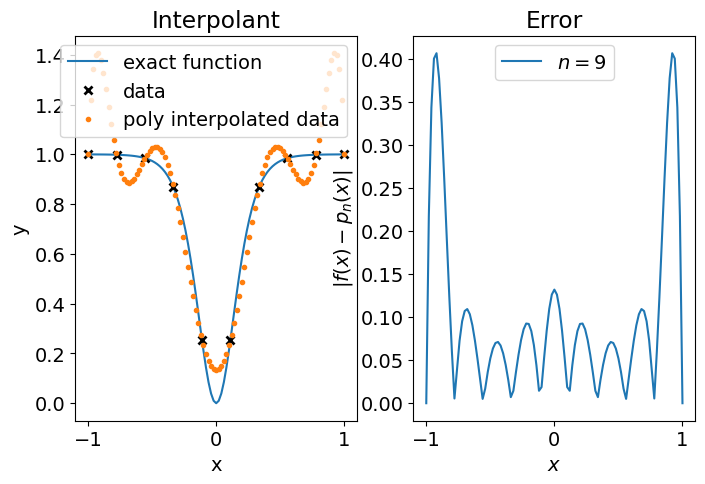

In [8]:
new_x0 = np.linspace(-1,1,10)
new_y0 = (np.tanh(5*new_x0))**2

new_A = np.vander(new_x0)

new_coeff = np.linalg.solve(new_A,new_y0)
                
new_coeff

M = 10
N = 101

new_x = np.linspace(-1,1,N)

new_y = np.zeros_like(new_x)

for i in range(0,M):       
    new_y += new_coeff[i]*new_x**(M-1-i)
    
fig, (ax3, ax4) = plt.subplots(nrows = 1, ncols = 2, figsize=(8,5))

ax3.plot(new_x,(np.tanh(5*new_x))**2,label='exact function')
ax3.plot(new_x0,new_y0,'kx',mew=2,label='data')
ax3.plot(new_x,new_y,'.',label='poly interpolated data')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('Interpolant')
ax3.legend()

lbl = '$n = $'+str(9)
ax4.plot(new_x,np.abs(new_y-(np.tanh(5*new_x))**2),label=lbl)
ax4.set_xlabel('$x$')
ax4.set_ylabel('$|f(x)-p_n(x)|$')
ax4.set_title('Error')
ax4.legend()
    
plt.show()

In [9]:
# While both functions have increasing error on the edges and decreasing error in the middle of the domain, the second function has an extremely high error.